In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ExcelR/Assignment/Multi linear regression/50_Startups.csv")


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# **EDA**

In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

There is not any null value is present in data

In [ ]:
df.shape

(50, 5)

There is 50 Rows and 5 Columns in our data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Finding the correlation between all available columns

In [ ]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


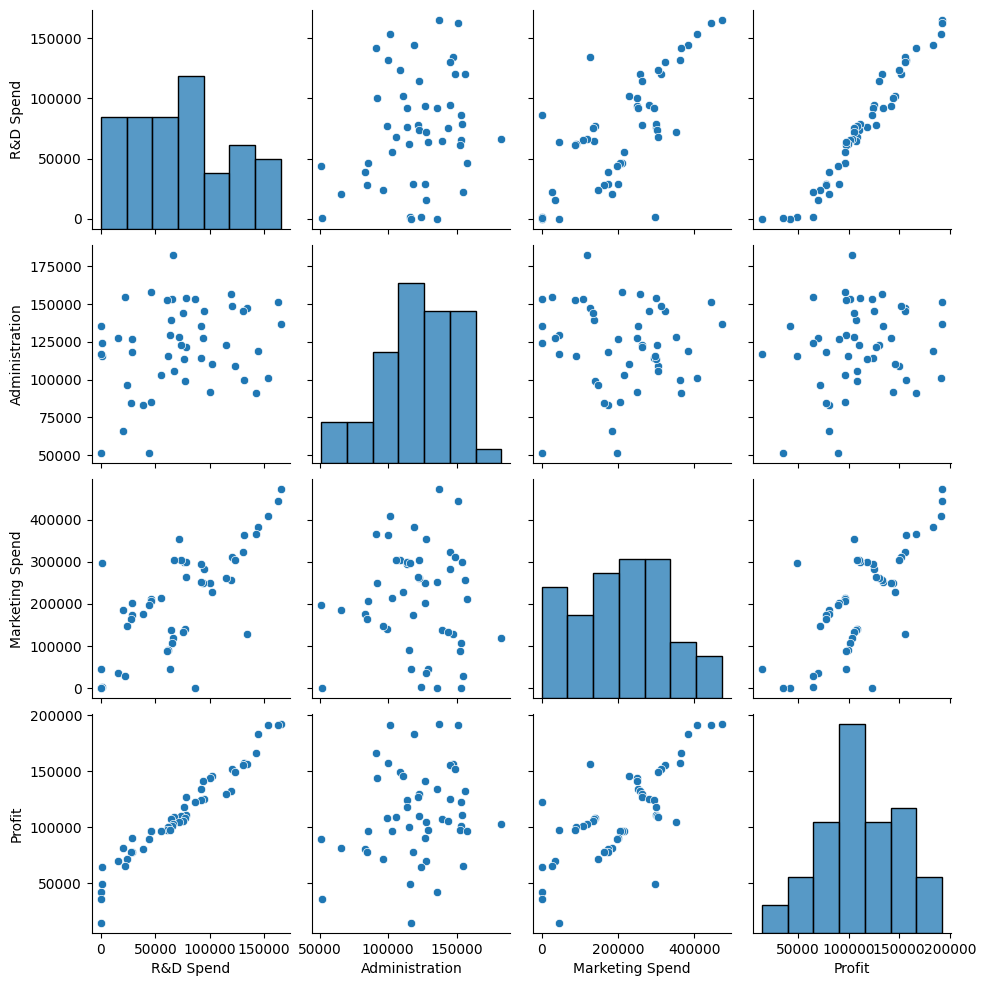

In [ ]:
sns.pairplot(df)

Insights:



R&D Spend and Profit and Marketing spend and Profit are higly correlated.


## Correlation Matrix

In [ ]:
corr=df.corr()

<ipython-input-10-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

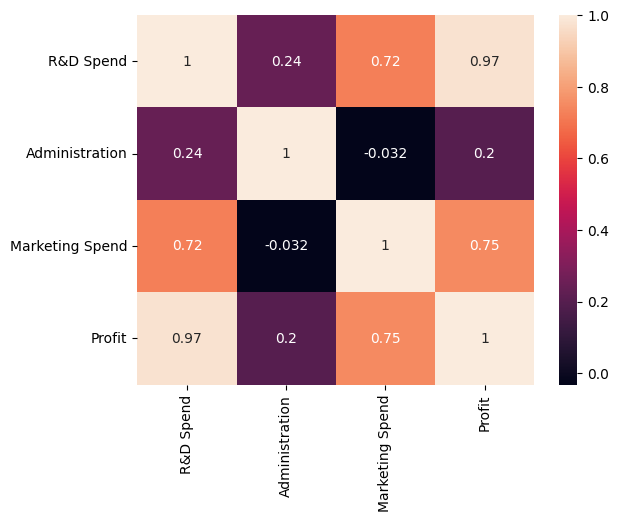

In [ ]:
sns.heatmap(corr,annot=True)


As we have said before it is obvious from correlation matrix also Profit & R&D spend and Profit & Marketing spend are very correlated.

Lets check if we have outliers in our data

(50, 5)

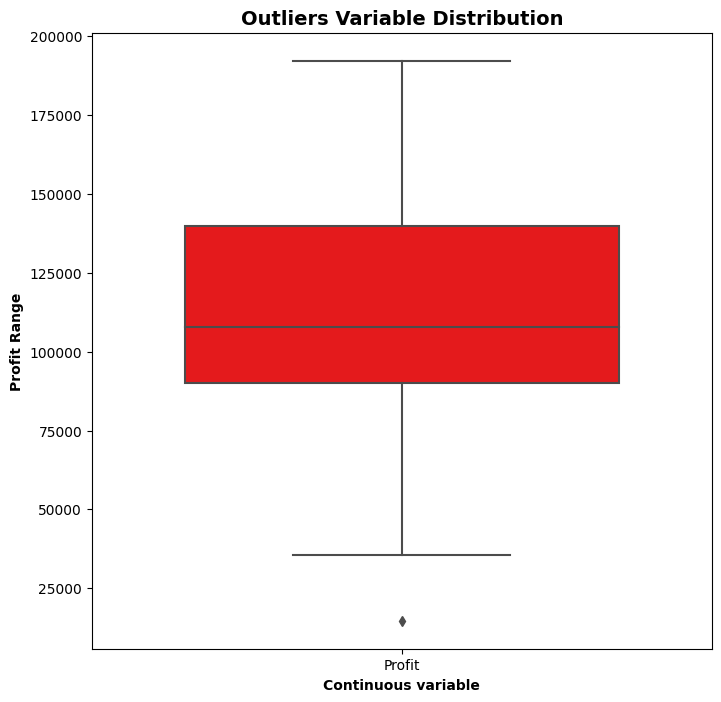

In [ ]:
outliers=["Profit"]
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=df[outliers],orient='v',palette="Set1",whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Profit Range",fontweight='bold')
plt.xlabel("Continuous variable",fontweight='bold')
df.shape

There is only one outlier in our data which is profit below 25000 and we can remove that.

In [ ]:
df=df[df['Profit']>=25000]

(49, 5)

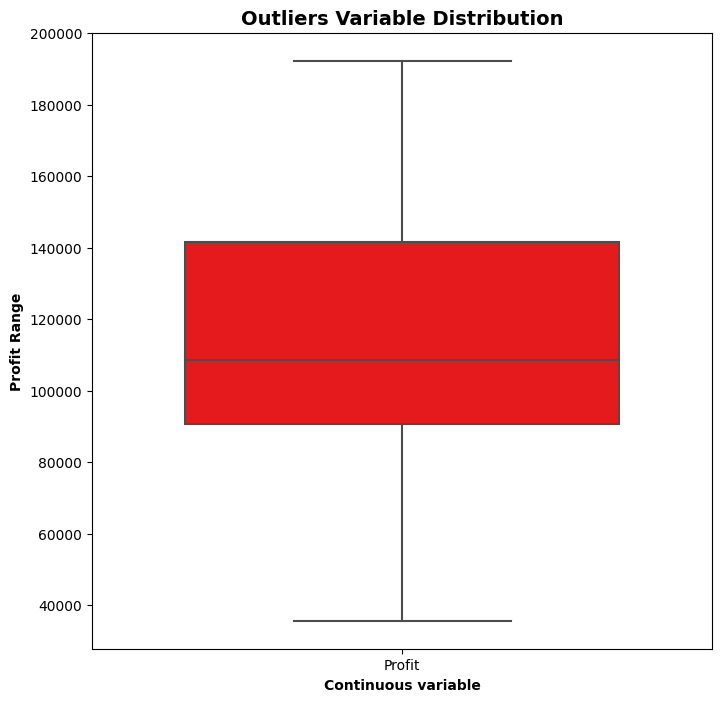

In [ ]:
outliers=["Profit"]
plt.rcParams['figure.figsize']=[8,8]
sns.boxplot(data=df[outliers],orient='v',palette="Set1",whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Profit Range",fontweight='bold')
plt.xlabel("Continuous variable",fontweight='bold')
df.shape

Now we don't have any outliers

# Data Visualisation 
for better understanding of data

Text(0, 0.5, 'R&D Spend')

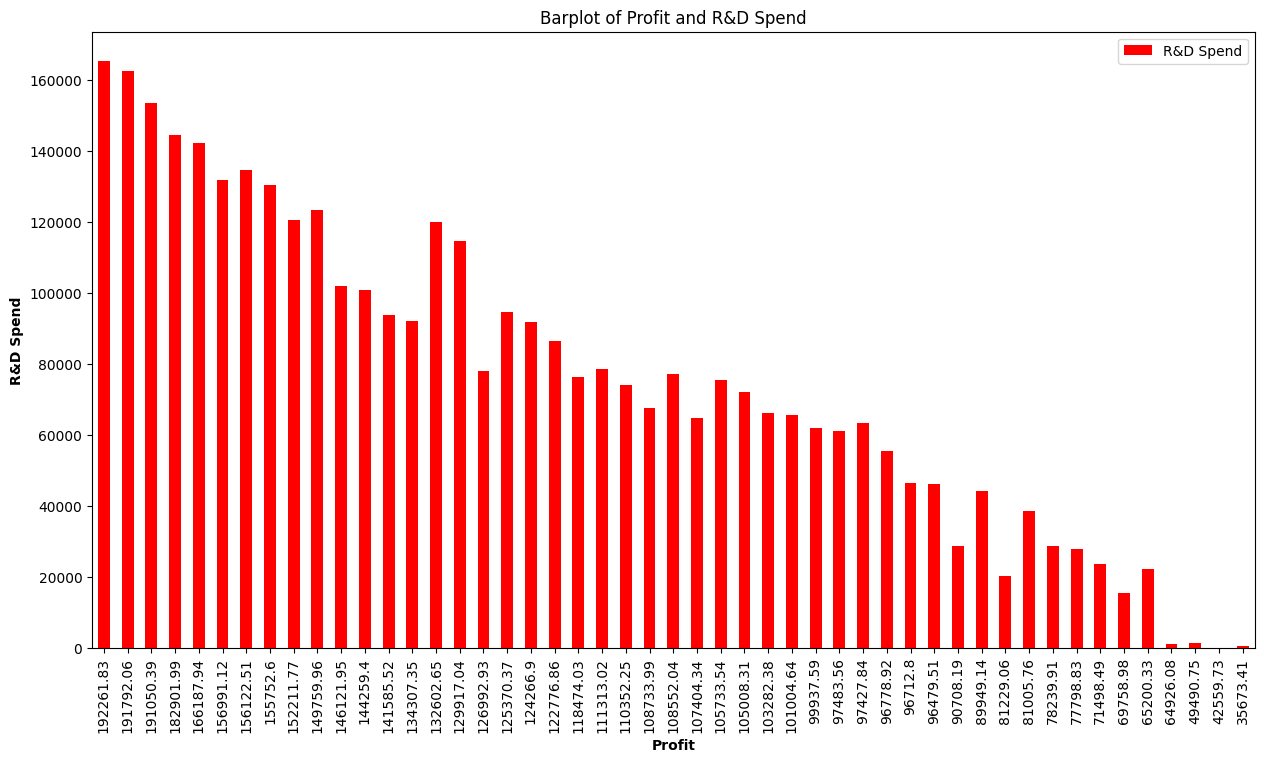

In [ ]:
# Visualizing the Profit and R&D spend

plt.rcParams['figure.figsize'] = [15,8]
df.plot(x='Profit', y='R&D Spend',kind='bar', color='red')
plt.title('Barplot of Profit and R&D Spend')
plt.xlabel("Profit",fontweight = 'bold')
plt.ylabel("R&D Spend",fontweight = 'bold')

Text(0, 0.5, 'Marketing Spend')

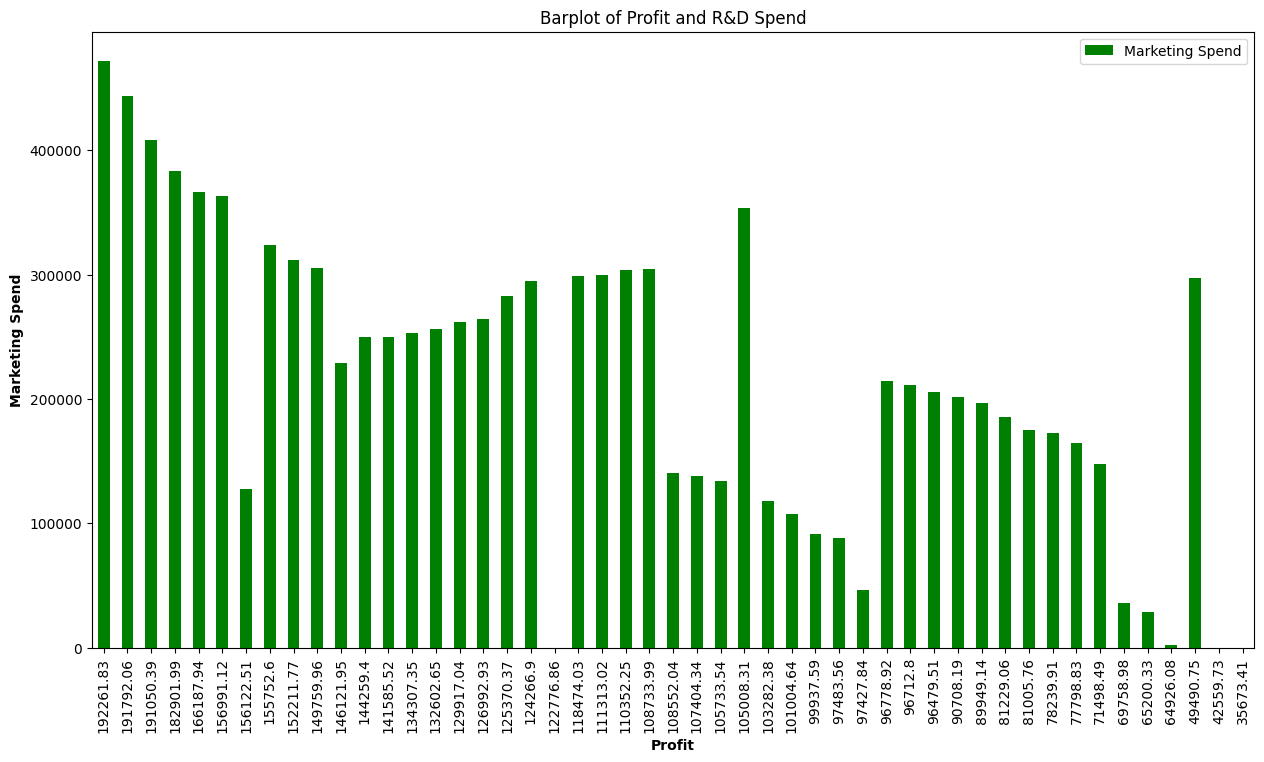

In [ ]:
# Visualizing the Profit and Marketing Spend

plt.rcParams['figure.figsize'] = [15,8]
df.plot(x='Profit', y='Marketing Spend',kind='bar', color='green')
plt.title('Barplot of Profit and R&D Spend')
plt.xlabel("Profit",fontweight = 'bold')
plt.ylabel("Marketing Spend",fontweight = 'bold')

Lets plot the distribution of profit

<ipython-input-23-654f6661b9ed>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Profit'])


<Axes: title={'center': 'Profit Distribution Plot'}, xlabel='Profit', ylabel='Density'>

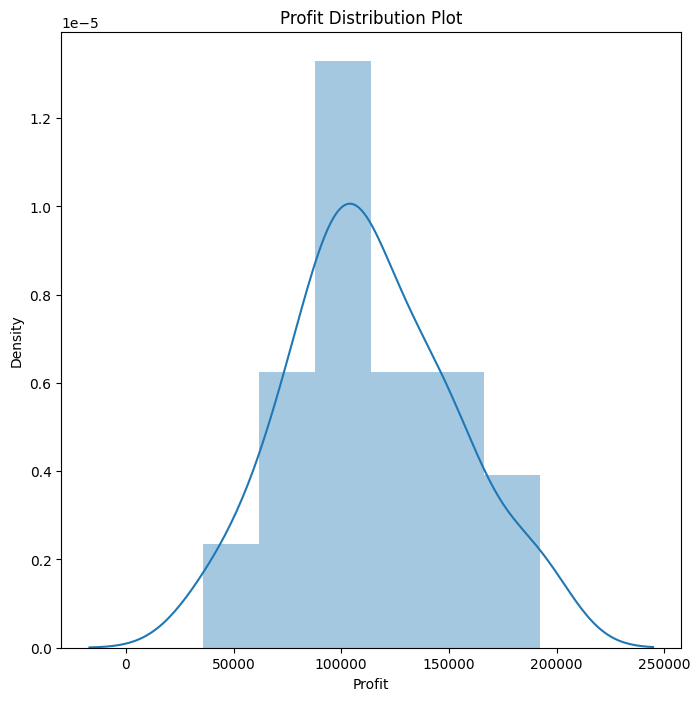

In [ ]:
plt.figure(figsize=(8,8))
plt.title('Profit Distribution Plot')
sns.distplot(df['Profit'])

Insights:

i)Most of the profit is between  75 thousand to 1.25 lakh.

ii)Profit distribution is very spread

### Regression model

In [ ]:
df = pd.get_dummies(df,columns=['State'])

In [ ]:
X=df[['R&D Spend','Administration','Marketing Spend','State_California','State_Florida','State_New York']]
Y=df[["Profit"]]

In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [ ]:
model=sm.OLS(Y,X).fit()
predictions= model.predict(X)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     216.6
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           2.51e-29
Time:                        20:24:59   Log-Likelihood:                -505.97
No. Observations:                  49   AIC:                             1024.
Df Residuals:                      43   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7836      0.039     20.056      0.000       0.705       0.862
Administration      -0.0220      0.044     -0.505      0.616      -0.110       0.066
Marketing Spend      0.0258      0.014      1.804      0.078      -0.003       0.055
State_California  5.338e+04   5794.239      9.212      0.000    4.17e+04    6.51e+04
State_Florida     5.182e+04   6064.140      8.544      0.000    3.96e+04     6.4e+04
State_New York    5.143e+04   5812.919      8.847      0.000    3.97e+04    6.31e+04
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.207
Skew:                           0.061   Prob(JB):                        0.902
Kurtosis:                       2.705   Cond. No.                     2.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R sq value is good hence the model can be accepted but some variable has high p value due to which there is multicollinearity issue in this model**

## Multicollinearity

### lets find cooks distance

In [ ]:
inf1=model.get_influence()

In [ ]:
summ_df=inf1.summary_frame()


In [ ]:
summ_df.sort_values('cooks_d',ascending=False)

,dfb_R&D Spend,dfb_Administration,dfb_Marketing Spend,dfb_State_California,dfb_State_Florida,dfb_State_New York,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
48,-0.138899,0.965611,0.580284,-1.089243,-1.112453,-1.318439,0.284116,-2.214751,0.257904,-1.305641,-2.325499,-1.370929
45,-0.243526,0.101556,-0.206646,0.117881,0.158341,0.323594,0.110116,2.096015,0.130728,0.812832,2.186189,0.847801
46,0.662664,-0.218153,-0.550979,0.151925,0.048022,0.138263,0.096243,-1.256784,0.267717,-0.759905,-1.265545,-0.765203
14,-0.262173,-0.298631,0.164905,0.315599,0.103696,0.323279,0.095268,-2.197156,0.105871,-0.756047,-2.304678,-0.793045
36,-0.427199,0.212287,0.241225,-0.109388,0.062963,-0.096855,0.072704,1.887000,0.109138,0.660473,1.947297,0.681577
38,-0.213063,-0.343666,0.119391,0.355364,0.342162,0.491625,0.067306,1.468346,0.157757,0.635483,1.488980,0.644413
2,0.302571,-0.261705,-0.018768,0.107089,0.213637,0.093261,0.061091,1.467797,0.145398,0.605429,1.488394,0.613925
15,-0.243620,0.077651,0.080323,0.004191,0.011783,-0.160843,0.055993,-2.020449,0.076040,-0.579620,-2.098933,-0.602135
3,0.168000,-0.073889,0.108132,-0.061577,-0.085780,0.055326,0.048997,1.493798,0.116409,0.542201,1.516191,0.550329
27,0.322370,-0.174979,-0.407000,0.202244,0.223252,0.090117,0.046139,-1.267136,0.147059,-0.526150,-1.276372,-0.529985


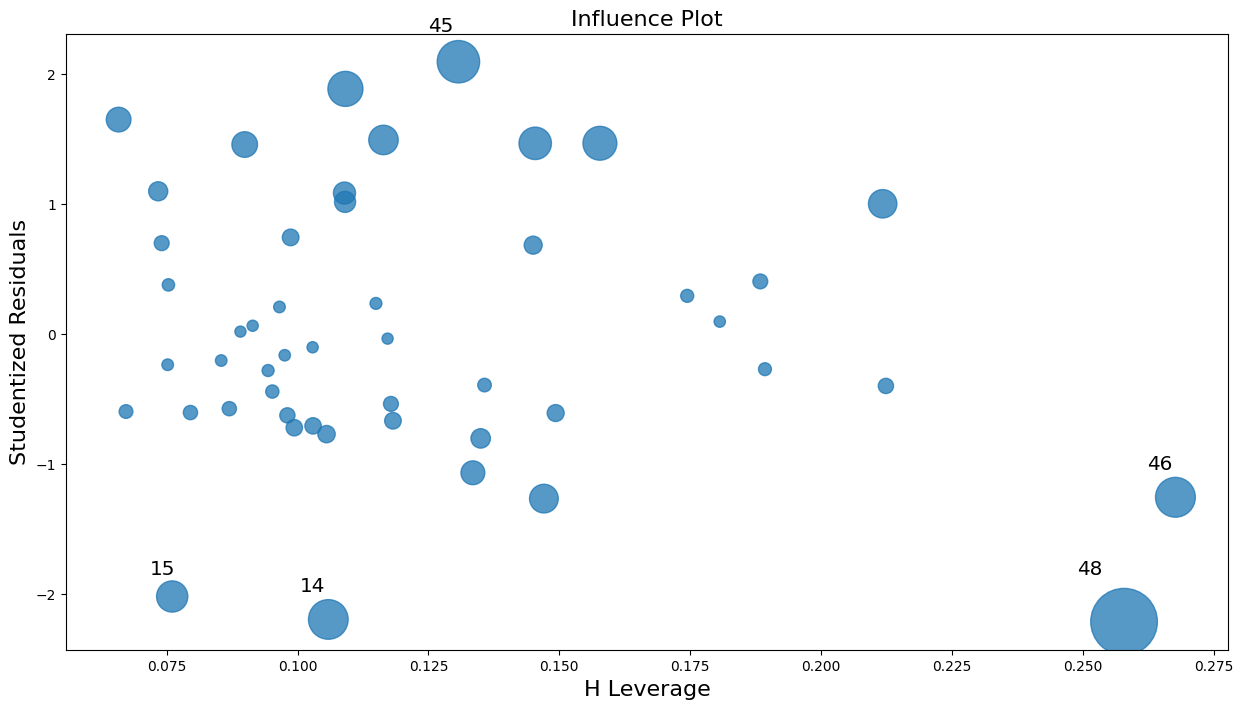

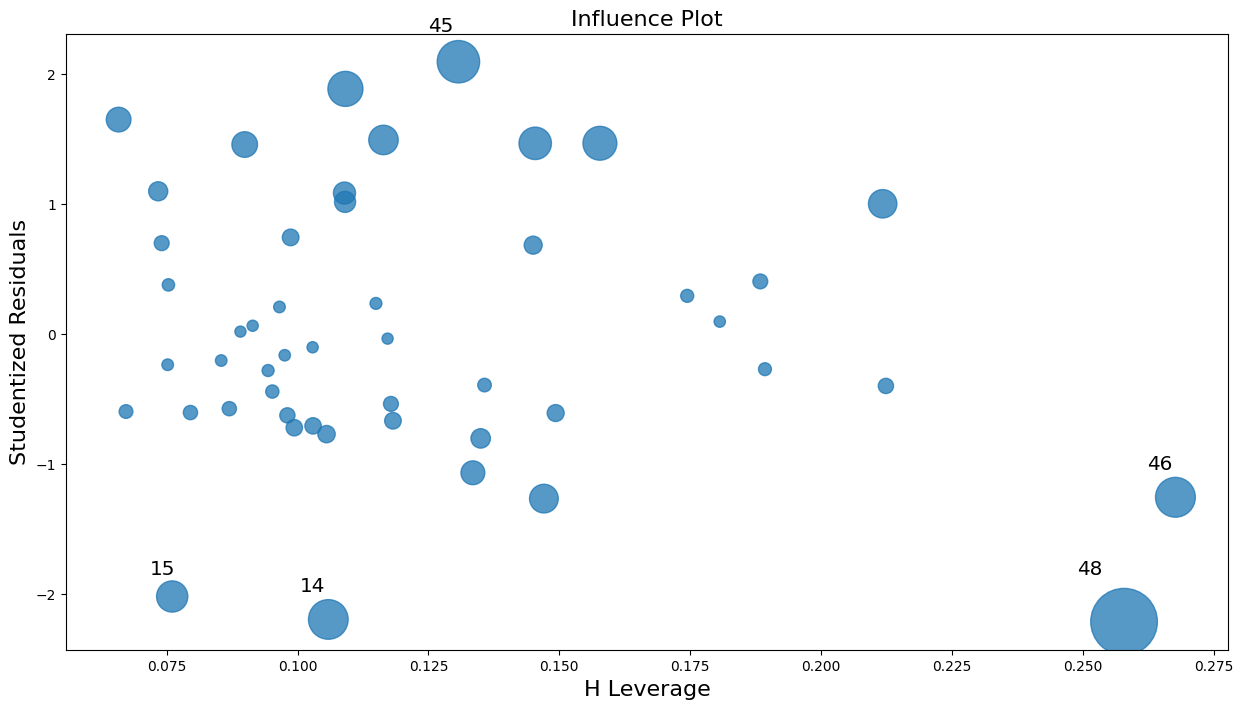

In [ ]:
inf1.plot_influence()

## Find VIF(Variance inflation facvtor)

In [ ]:
vif=pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["features"]=X.columns
vif.round(1)

,VIF,features
0,2.4,R&D Spend
1,1.2,Administration
2,2.3,Marketing Spend
3,8.6,State_California
4,9.5,State_Florida
5,9.2,State_New York


Administration has lowest VIF hence we need to discard this to impore model

In [ ]:
new_df=df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [ ]:
new_model=sm.OLS(Y,new_df).fit()
new_predictions=new_model.predict(new_df)

In [ ]:
new_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     275.3
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           1.60e-30
Time:                        20:25:00   Log-Likelihood:                -506.11
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7760      0.036     21.721      0.000       0.704       0.848
Marketing Spend      0.0281      0.013      2.082      0.043       0.001       0.055
State_California  5.081e+04   2738.498     18.553      0.000    4.53e+04    5.63e+04
State_Florida     4.919e+04   3097.926     15.879      0.000    4.29e+04    5.54e+04
State_New York    4.887e+04   2822.188     17.315      0.000    4.32e+04    5.46e+04
==============================================================================
Omnibus:                        0.123   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.940   Jarque-Bera (JB):                0.292
Skew:                           0.093   Prob(JB):                        0.864
Kurtosis:                       2.670   Cond. No.                     9.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Final Model

In [ ]:
new_df=df.drop(df.index[[46,48]])

In [ ]:
new_X=new_df[['R&D Spend','Marketing Spend','State_California','State_Florida','State_New York']]

In [ ]:
new_Y=new_df[["Profit"]]

In [ ]:
final_model= sm.OLS(new_Y,new_X).fit()
predictions=final_model.predict(new_X)

In [ ]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     253.5
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.29e-29
Time:                        20:28:21   Log-Likelihood:                -483.34
No. Observations:                  47   AIC:                             976.7
Df Residuals:                      42   BIC:                             985.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.7447      0.038     19.443      0.000       0.667       0.822
Marketing Spend      0.0325      0.014      2.328      0.025       0.004       0.061
State_California   5.21e+04   2682.921     19.421      0.000    4.67e+04    5.75e+04
State_Florida      5.14e+04   3106.856     16.543      0.000    4.51e+04    5.77e+04
State_New York    5.128e+04   2910.666     17.616      0.000    4.54e+04    5.71e+04
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.699
Prob(Omnibus):                  0.948   Jarque-Bera (JB):                0.306
Skew:                           0.052   Prob(JB):                        0.858
Kurtosis:                       2.618   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# We will try to improve R2 more

# Sq Root transformation of X

In [ ]:

X_sqrt= np.sqrt(new_df[['R&D Spend','Marketing Spend','State_California','State_New York']])


In [ ]:
i_model=sm.OLS(new_Y,X_sqrt).fit()

In [ ]:
i_prediction=i_model.predict(X_sqrt)

In [ ]:
i_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              958.9
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                    2.04e-41
Time:                        20:28:42   Log-Likelihood:                         -511.46
No. Observations:                  47   AIC:                                      1031.
Df Residuals:                      43   BIC:                                      1038.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend          379.4450     29.034     13.069      0.000     320.892     437.998
Marketing Spend     24.1363     16.899      1.428      0.160      -9.943      58.216
State_California  7223.6408   4264.222      1.694      0.097   -1375.982    1.58e+04
State_New York    6942.9912   4414.388      1.573      0.123   -1959.471    1.58e+04
==============================================================================
Omnibus:                       16.741   Durbin-Watson:                   0.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.310
Skew:                           1.282   Prob(JB):                     3.89e-05
Kurtosis:                       4.948   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root transformation of Y

In [ ]:
Y_sqrt=np.sqrt(new_df["Profit"])

In [ ]:
ii_model=sm.OLS(Y_sqrt,new_X).fit()

In [ ]:
ii_prediction=ii_model.predict(new_X)

In [ ]:
ii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     233.8
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           4.20e-28
Time:                        20:28:42   Log-Likelihood:                -178.65
No. Observations:                  47   AIC:                             367.3
Df Residuals:                      42   BIC:                             376.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.0011   5.86e-05     18.666      0.000       0.001       0.001
Marketing Spend   4.591e-05   2.14e-05      2.150      0.037    2.81e-06     8.9e-05
State_California   241.7845      4.104     58.918      0.000     233.503     250.066
State_Florida      243.4210      4.752     51.223      0.000     233.831     253.011
State_New York     242.0562      4.452     54.369      0.000     233.072     251.041
==============================================================================
Omnibus:                        5.422   Durbin-Watson:                   1.720
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.418
Skew:                          -0.539   Prob(JB):                        0.110
Kurtosis:                       4.046   Cond. No.                     1.02e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Sq Root transformation of X & Y


In [ ]:
iii_model=sm.OLS(Y_sqrt,X_sqrt).fit()

In [ ]:
iii_prediction=iii_model.predict(X_sqrt)

In [ ]:
iii_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Profit   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.976
Method:                 Least Squares   F-statistic:                              484.1
Date:                Tue, 18 Apr 2023   Prob (F-statistic):                    3.86e-35
Time:                        20:28:42   Log-Likelihood:                         -250.95
No. Observations:                  47   AIC:                                      509.9
Df Residuals:                      43   BIC:                                      517.3
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
R&D Spend            0.8379      0.114      7.371      0.000       0.609       1.067
Marketing Spend      0.1442      0.066      2.179      0.035       0.011       0.278
State_California    62.8544     16.697      3.764      0.001      29.181      96.527
State_New York      55.4710     17.285      3.209      0.003      20.612      90.330
==============================================================================
Omnibus:                       10.022   Durbin-Watson:                   1.213
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                9.448
Skew:                           0.949   Prob(JB):                      0.00888
Kurtosis:                       4.107   Cond. No.                     1.41e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## i_model has best R2 value hence we will use that model

In [ ]:
i_prediction.tail()

42    74851.066744
43    58742.058900
44    67794.165257
45    19996.639860
47     7223.640826
dtype: float64

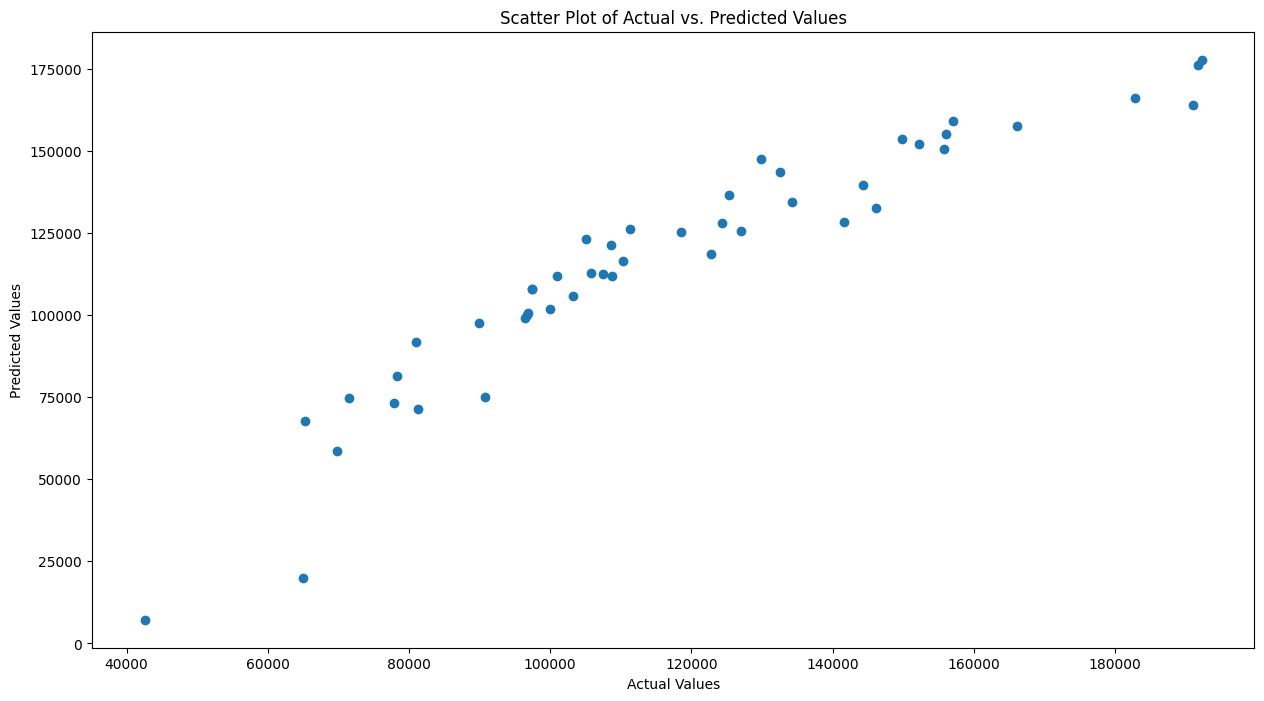

In [ ]:
plt.scatter(new_Y, i_prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Actual vs. Predicted Values')
plt.show()